# PROJECT. Определяем количество ботов на сайте

### Задачи:
### 1. Оценить количество ботов, которые заходят на наш сайт, и их долю от всего трафика.
### **Гипотеза: количество настоящих пользователей во много раз превосходит количество роботов.**

### 2. Определить, с каких источников и в какое время суток чаще всего заходят роботы.
### **Гипотеза: чаще всего роботы заходят с поисковых систем (Search engine traffic) и по ссылкам на сайтах (Link traffic) в дневное время**

## Гипотеза №1

In [60]:
# Загружаем необходимые библиотеки
import json 
import requests
import pandas as pd
from pprint import pprint

In [61]:
# Определяем наш токен, параметры headers и параметры запроса
token = 'AQAAAAATYmkoAAc0w7nAVIVVrUJ4mP4_nmAhegk'
headers = {'Authorization': 'OAuth ' + token}
params = {'metrics': 'ym:s:visits,ym:s:robotPercentage',
          'dimensions': 'ym:s:lastsignTrafficSource,ym:s:hour',  
          'date1': '2020-09-01',  
          'date2': '2020-09-30',     
          'ids': 30177909,
          'accuracy':'full',
          'limit':100000}
# Создаем запрос, проверяем статус и переводим в формат json
url = 'https://api-metrika.yandex.net/stat/v1/data'
response = requests.get(url,headers = headers, params = params)
print (response.status_code)
data = response.json()
data

200


{'query': {'ids': [30177909],
  'dimensions': ['ym:s:lastsignTrafficSource', 'ym:s:hour'],
  'metrics': ['ym:s:visits', 'ym:s:robotPercentage'],
  'sort': ['-ym:s:visits'],
  'date1': '2020-09-01',
  'date2': '2020-09-30',
  'limit': 100000,
  'offset': 1,
  'group': 'Week',
  'auto_group_size': '1',
  'attr_name': '',
  'quantile': '50',
  'offline_window': '21',
  'attribution': 'LastSign',
  'currency': 'RUB',
  'adfox_event_id': '0'},
 'data': [{'dimensions': [{'icon_id': '2',
     'icon_type': 'traffic-source',
     'name': 'Search engine traffic',
     'id': 'organic'},
    {'id': '16', 'name': '16:00'}],
   'metrics': [251.0, 24.70119522]},
  {'dimensions': [{'icon_id': '2',
     'icon_type': 'traffic-source',
     'name': 'Search engine traffic',
     'id': 'organic'},
    {'id': '15', 'name': '15:00'}],
   'metrics': [240.0, 26.25]},
  {'dimensions': [{'icon_id': '2',
     'icon_type': 'traffic-source',
     'name': 'Search engine traffic',
     'id': 'organic'},
    {'id': '1

In [62]:
# Создаем функцию, чтобы получить удобное представление группировок и метрик
def getMetrikaDataInListOfDicts(data):
    list_of_dicts = []
    dimensions_list = data['query']['dimensions']
    metrics_list = data['query']['metrics']
    for data_item in data['data']:
        d = {}
        for i,dimension in enumerate(data_item['dimensions']):
            d[dimensions_list[i]] = dimension['name']
        for i,metric in enumerate(data_item['metrics']):
            d[metrics_list[i]] = metric
        list_of_dicts.append(d)
    return list_of_dicts
metrika_list_of_dicts =  getMetrikaDataInListOfDicts(data)
metrika_list_of_dicts

[{'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:hour': '16:00',
  'ym:s:visits': 251.0,
  'ym:s:robotPercentage': 24.70119522},
 {'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:hour': '15:00',
  'ym:s:visits': 240.0,
  'ym:s:robotPercentage': 26.25},
 {'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:hour': '11:00',
  'ym:s:visits': 228.0,
  'ym:s:robotPercentage': 25.87719298},
 {'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:hour': '13:00',
  'ym:s:visits': 227.0,
  'ym:s:robotPercentage': 28.1938326},
 {'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:hour': '12:00',
  'ym:s:visits': 225.0,
  'ym:s:robotPercentage': 24.88888889},
 {'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:hour': '14:00',
  'ym:s:visits': 225.0,
  'ym:s:robotPercentage': 25.77777778},
 {'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:hour': '17:00',
  'ym:s:visits': 209.0,
  'ym:s:robotPercentage': 26.315

In [63]:
# Создаем датафрейм с полученными группировками и метриками, переименовываем столбцы
df = pd.DataFrame(metrika_list_of_dicts)
df.columns = ['Source', 'Hour', 'Visits', '% of robots']
display(df.head(10))

,Source,Hour,Visits,% of robots
0,Search engine traffic,16:00,251.0,24.701195
1,Search engine traffic,15:00,240.0,26.250000
2,Search engine traffic,11:00,228.0,25.877193
3,Search engine traffic,13:00,227.0,28.193833
4,Search engine traffic,12:00,225.0,24.888889
5,Search engine traffic,14:00,225.0,25.777778
6,Search engine traffic,17:00,209.0,26.315789
7,Search engine traffic,10:00,186.0,19.354839
8,Search engine traffic,21:00,166.0,17.469880
9,Search engine traffic,19:00,161.0,23.602484


In [64]:
#Создаем отдельный столбик "% of robots", поделенный на 100
df['Robots share'] = df['% of robots']/100
# Получаем количество роботов и переводим в целочисленные значения
df['Robots'] = df['Robots share']*df['Visits']
df['Robots'] = df['Robots'].astype(int) 
df['Visits'] = df['Visits'].astype(int)
df

,Source,Hour,Visits,% of robots,Robots share,Robots
0,Search engine traffic,16:00,251,24.701195,0.247012,62
1,Search engine traffic,15:00,240,26.250000,0.262500,63
2,Search engine traffic,11:00,228,25.877193,0.258772,58
3,Search engine traffic,13:00,227,28.193833,0.281938,64
4,Search engine traffic,12:00,225,24.888889,0.248889,56
...,...,...,...,...,...,...
102,Social network traffic,02:00,1,0.000000,0.000000,0
103,Social network traffic,04:00,1,0.000000,0.000000,0
104,Social network traffic,10:00,1,0.000000,0.000000,0
105,Recommendation system traffic,08:00,1,0.000000,0.000000,0


In [65]:
# Подсчитаем кол-во роботов в трафике за сентябрь 2020г.
sum(df['Robots'])

932

In [66]:
# Подсчитаем долю от трафика
df['Robots'].sum()/df['Visits'].sum()

0.21599073001158747

### Выводы по гипотезе №1
### Гипотеза №1 подтвердилась. Действительно, количество реальных пользователей значительно превышает количество роботов, посещающих сайт. Количество роботов составляет 932, а их доля от трафика - 1/4.

## Гипотеза №2

In [67]:
# Какие источники используются?
df['Source'].unique()

array(['Search engine traffic', 'Direct traffic', 'Link traffic',
       'Social network traffic', 'Internal traffic',
       'Cached page traffic', 'Recommendation system traffic'],
      dtype=object)

In [68]:
# Сводная таблица для источников
pivot = df.pivot_table(values = ['Robots', 'Visits'], index = ['Source'], aggfunc = 'sum')
# Создаем столбик, где будет доля роботов от общего числа роботов по источникам
pivot['Share of robots'] = pivot['Robots']/pivot['Robots'].sum()*100
pivot

,Robots,Visits,Share of robots
Source,,,
Cached page traffic,1,6,0.107296
Direct traffic,165,757,17.703863
Internal traffic,3,10,0.321888
Link traffic,27,126,2.896996
Recommendation system traffic,0,2,0.000000
Search engine traffic,729,3334,78.218884
Social network traffic,7,80,0.751073


In [69]:
#Импортируем необходимые библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import warnings; warnings.simplefilter('ignore')

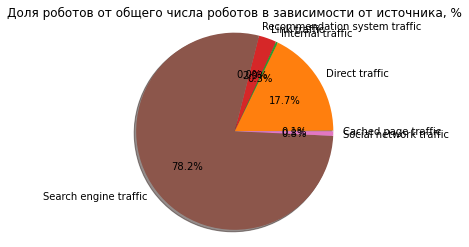

In [70]:
# Визуализируем полученные данные
fig1, ax1 = plt.subplots()
ax1.pie(x = pivot['Share of robots'], labels=pivot.index, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')
ax1.set_title(label = "Доля роботов от общего числа роботов в зависимости от источника, %")
plt.show()

#### Самым популярным источником для роботов является поисковая система (78,2%). Вторыми по значимости являются прямые заходы на страницу(17,7%).

In [73]:
pivot = df.pivot_table(values = ['Robots', 'Visits'], index = ['Hour'], aggfunc = 'sum')
pivot['Share of robots'] = pivot['Robots']/pivot['Robots'].sum()*100
pivot

,Robots,Visits,Share of robots
Hour,,,
00:00,19,115,2.038627
01:00,12,74,1.287554
02:00,5,56,0.536481
03:00,4,38,0.429185
04:00,4,33,0.429185
05:00,4,42,0.429185
06:00,6,53,0.643777
07:00,9,85,0.965665
08:00,35,159,3.755365


<AxesSubplot:xlabel='Hour'>

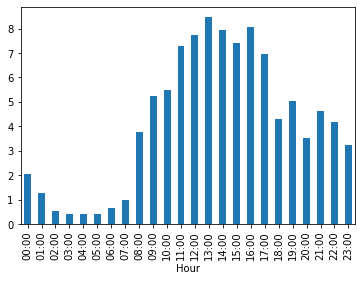

In [74]:
pivot['Share of robots'].plot(kind = 'bar')

#### Чаще всего роботы заходят на страницу в дневное и вечернее время. Пик активности достигается с 11:00 до 17:00. Самое низкое время активности - с 00:00 до 7:00.

<AxesSubplot:xlabel='Hour'>

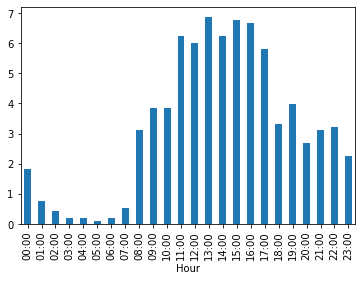

In [72]:
# Рассмотрим в разрезе пар "Источник-время" для источника "Поисковая система"
pivot = df.pivot_table(values = ['Robots', 'Visits'], index = ['Source', 'Hour'], aggfunc = 'sum')
pivot['Share of robots'] = pivot['Robots']/pivot['Robots'].sum()*100
pivot.sort_values(by=['Share of robots'])
pivot['Share of robots'].loc['Search engine traffic'].plot(kind = 'bar')

#### Соблюдается прежняя тенденция.

### Выводы по гипотезе №2:
### Гипотеза №2 нашла частичное подтверждение. Действительно, в сентябре 2020 года чаще всего роботы заходили на страницу с помощью поисковой системы в дневное время. Однако, было найдено подтверждение тому, что роботы также используют прямые переходы на страницу, и активность сохраняется в вечернее время вплоть до 23:00.  